Оцінювання наявності даної роботи буде враховувати як наявність самих візуалізацій (вони можуть незначно відрізнятися від прикладів, але повинні змістовно відображати суть задачі) та опис отриманих вами результатів. При наявності ЛИШЕ візуалізацій без роз'яснень, завдання не буде зараховане за наявне.

Під час виконання вам дозволено користуватися будь-якими зручними для вас Python бібліотеками для візуалізації.

# I. Receiving Data.

In [30]:
# cell for imports. All imports must go here.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from google.colab import drive

1. (2б) Для виконання цієї лабораторної роботи Вам необхідно скористатися вибіркою titanic ([train.csv](https://www.kaggle.com/c/titanic/data?select=train.csv)). Зчитайте його та збережіть його у змінну, щоб у подальшому її використати для візуалізацій. Виведіть інформацію про кожну колонку, її індекс, тип та кількість непропущених значень та перші кілька рядків датафрейму.


In [7]:
drive.mount('/content/drive')

file_path = '/content/drive/MyDrive/Python/train.csv'

titanic_df = pd.read_csv(file_path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [10]:
titanic_df.info()
titanic_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# IІ. Data Visualization.

2. (10б) Створіть pie chart, який би показував співвідношення виживших до загиблих.

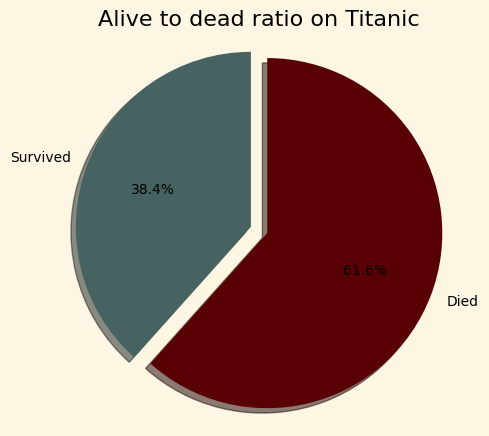

In [29]:
plt.style.use('Solarize_Light2')

survived = titanic_df['Survived'].value_counts()[1]
dead = titanic_df['Survived'].value_counts()[0]

labels = ['Survived', 'Died']
sizes = [survived, dead]
colors = ['#466362', '#590004']
explode = (0.1, 0)

plt.figure(figsize=(4, 4))
plt.pie(sizes, explode=explode, colors=colors, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)

plt.title('Alive to dead ratio on Titanic')

plt.axis('equal')

plt.show()


З діаграми видно, що частка виживших становить всього 38.4%, і більшість пасажирів загинуло (близько в півтора рази більше порівняно з вижившими).


3. (20б) Створіть bar chart, який би показував співвідношення загиблих до виживших для кожної статі. Для groupby використовуйте атрибут as_index=False.


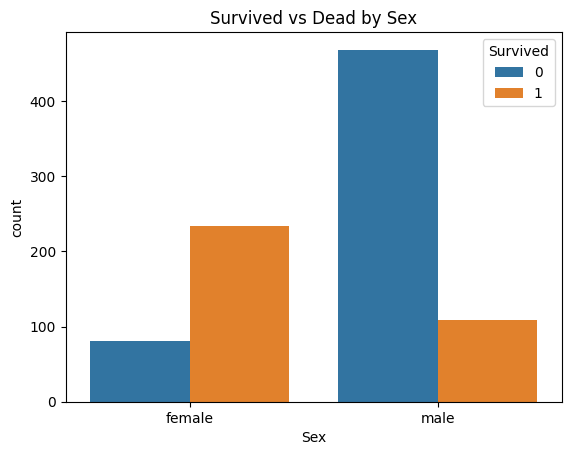

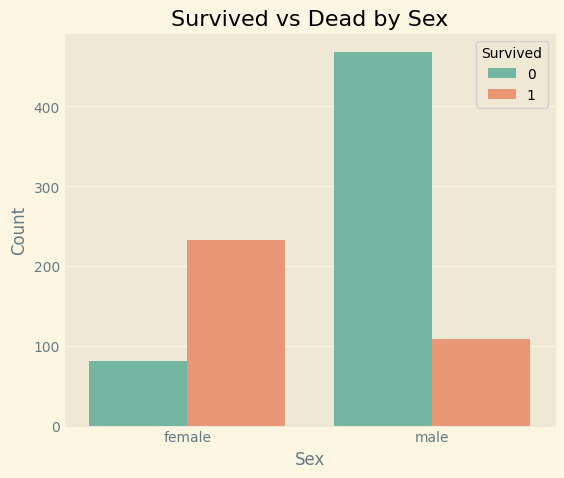

In [51]:
gender_survival = titanic_df.groupby(['Sex', 'Survived'], as_index=False).size()
gender_survival = gender_survival.rename(columns={'size': 'Count'})
sns.set_palette("Set2")

plt.figure(figsize=(5, 4))
sns.barplot(x='Sex', y='Count', hue='Survived', data=gender_survival)

plt.title('Survived vs Dead by Sex')
plt.legend(title='Survived')
plt.show()

Зі стопвчастої діаграми видно, що найбільше виживших жіночої статі, при тому що загалом чоловіків на Титаніку було більше. Більшість жінок вижила, більшісь чоловіків померла.

4. (20б) Відобразіть кількість пропущених значень в датасеті по кожній із змінних.

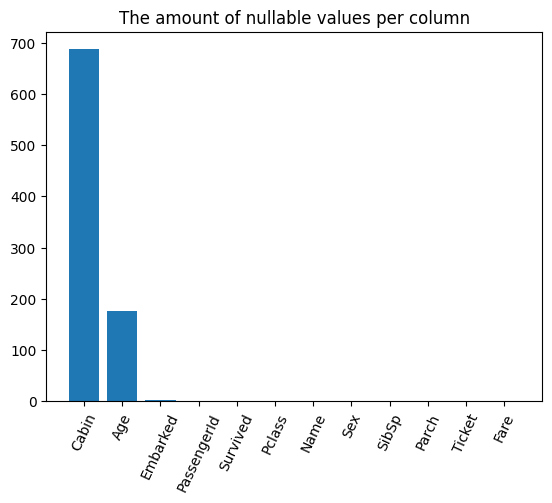

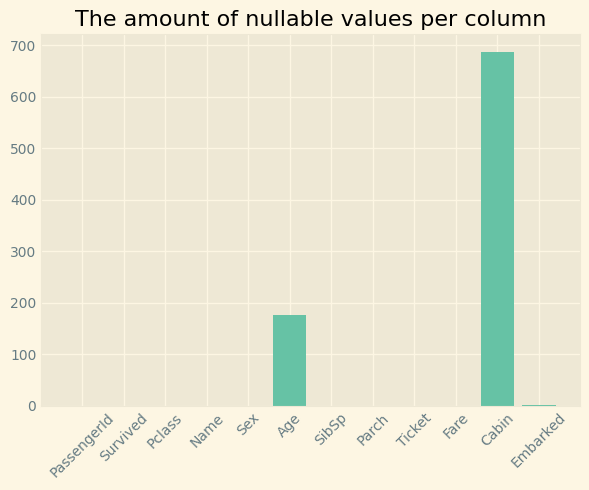

In [64]:
null_counts = titanic_df.isnull().sum()

plt.figure(figsize=(6, 5))
plt.bar(null_counts.index, null_counts.values)

plt.title('The amount of nullable values per column')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()


Стовпець Cabin має дуже велику кількість пропущених значень - більше ніж заповнених значень, тобто про більшість пасажирів невідомо їх номер кабіни. Також про трохи менше за 200 пасажирів невідомо їх вік (Age), і про декілька людей невідомо пункт, де вони сіли на корабель (Embarked).

5. (10б) Побудуйте наступний графік, дайте йому назву та опишіть, що власне на них відображається.

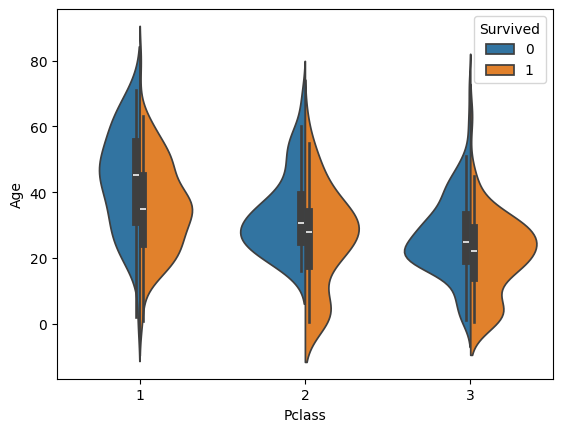

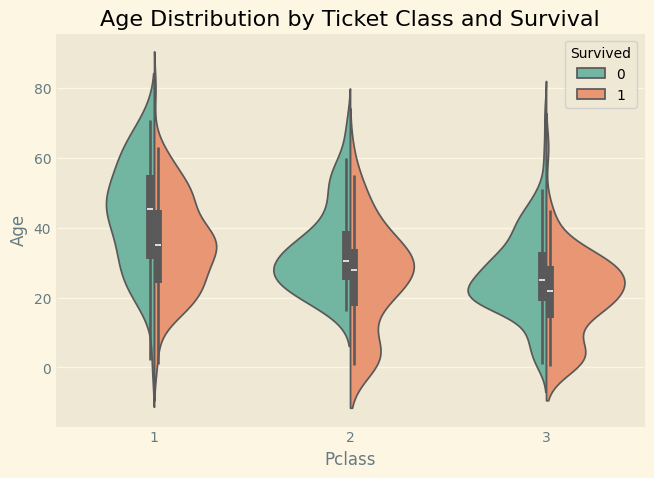

In [66]:

plt.figure(figsize=(6, 4))
sns.violinplot(x='Pclass', y='Age', hue='Survived', data=titanic_df, split=True)

plt.title('Age Distribution by Ticket Class and Survival')
plt.legend(title='Survived')

plt.show()


Цей violin plot показує розподіл між вижившими та загиблими згідно їх віку, по трьох можливих класах квитка (1, 2 і 3). Видно, що в усіх класах найбільша категорія за виживанням це 20-40 років, однак в 2 та 3 класах в цій категорії також найбільше загиблих, в той час як в 1 класі більше загиблих припало на 40-60 років. Також 1 клас має найбільшу кількість загиблих похилого віку (60+ років). 2 і 3 класи мають значно більше виживших дітей, ніж 1 клас, однак з діаграми видно, що в 1 класі загальна кількість дітей була малою - як виживших, так і загиблих. Загалом, молодші пасажири мали більше шансів на виживання.

6. (13б) Побудуйте графік розподілу частот по віку пасажирів.


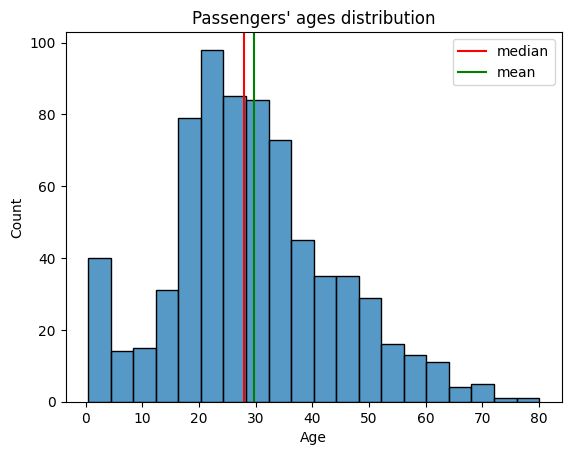

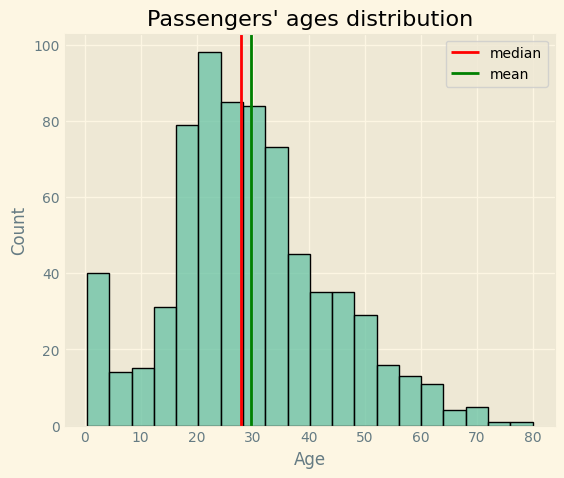

In [143]:
titanic_age = titanic_df['Age']

plt.figure(figsize=(5, 4))
sns.histplot(titanic_age, bins=20, kde=False)

mean_age = titanic_age.mean()
median_age = titanic_age.median()

plt.axvline(median_age, color='red', linestyle='-',label='median')
plt.axvline(mean_age, color='green', linestyle='-',label='mean')

plt.xticks()
plt.yticks()


plt.title("Passengers' ages distribution")
plt.legend()

plt.show()


Найменша вікова категорія - 70-80 років, Найбільша - 20-30 років. Середній вік та медіана близькі за значенням і дорівнюють близько ~30 років. На кораблі було приблизно 40 дітей молодше 5 років. Гістограма є скошеною вліво, що вказує на те. що на Титаніку було більше молодих людей ніж старих.

7. (25б) Поставте бізнес-питання до даних. Дайте на нього відповідь за допомогою візуалізацій. Прокоментуйте отриману відповідь.

Питання до даних: чи існує залежність між класом квитка (Pclass) та статтю (Sex) пасажира та його шансами на виживання?



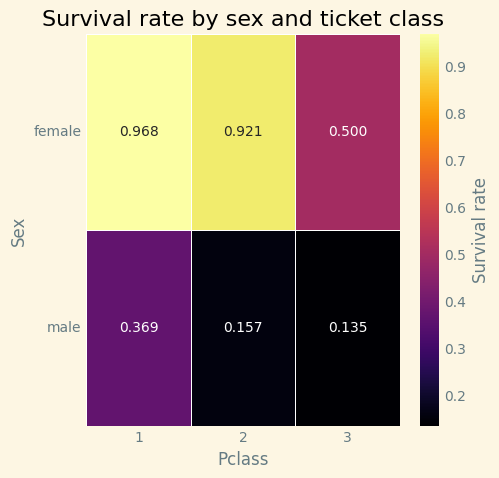

<Axes: xlabel='Pclass', ylabel='count'>

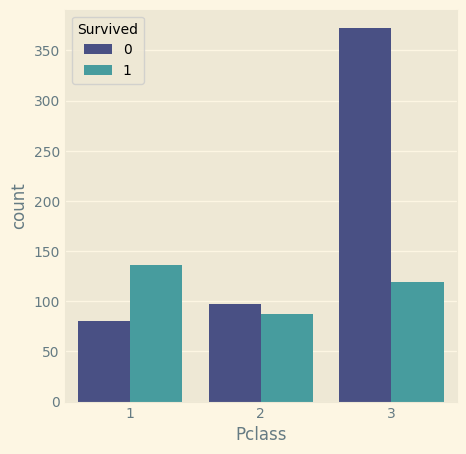

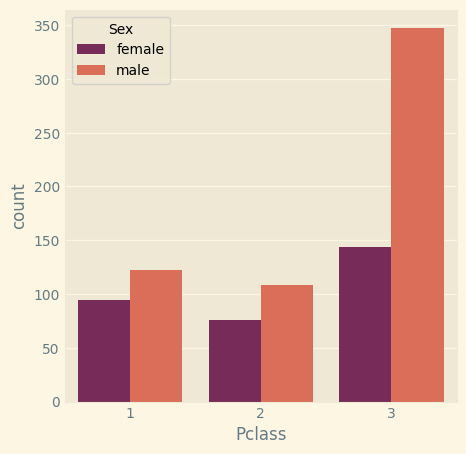

In [142]:
pivot_table = titanic_df.pivot_table(values='Survived', index='Sex', columns='Pclass')

plt.figure(figsize=(4, 4))
sns.heatmap(pivot_table, annot=True, cmap='inferno', fmt=".3f", linewidths=.5, cbar_kws={'label': 'Survival rate'})
plt.title('Survival rate by sex and ticket class')
plt.yticks(rotation=0)
plt.show()

titanic_df['FamilySize'] = titanic_df['SibSp'] + titanic_df['Parch']


plt.figure(figsize=(4, 4))

sns.countplot(data=titanic_df, x="Pclass", palette='mako',hue="Survived")

plt.figure(figsize=(4, 4))
sns.countplot(data=titanic_df, x="Pclass", palette='rocket',hue="Sex")




Візуалізація містить три діаграми - теплову мапу, яка відображає частку виживших пасажирів за статтю та класом квитка, а також дві стовпчаті діаграми, що відображають розподіл людей в усіх трьох классах за статтю та за виживанням. З теплової мапи бачимо, що найбільший шанс вижити був у жінок з першого та другого класу (96% та 92% вижили), в той час як з третього класу вижили лише 50% жінок. Частка виживших значно менша серед чоловіків, де в першому класі вижило 37%, а в двох інших всього лише 15% і менше.

Можна зробити висновок про позитивну кореляцію шансу вижити з більш дорожчим класом квитка, а також з жіночою статтю. Висока кількість загиблих серед 3 класу може також бути пов'язана з загальною вищою кількістю людей в цьому класі, як видно зі стовпчатих діаграм - вона більша за 1 і 2 класи разом узяті.

Зі стовпчатих діаграм також видно, що, хоч чоловіків було більше за жінок в кожному класі, у жінок всіх класів було більше шансів вижити. Це разом з даними в тепловій мапі вказує на те, що серед двох показників стать грала найбільшу роль у виживанні пасажирів; серед чоловіків квиток першого класу підвищував шанси на виживання в два рази, однак поміж 2 та 3 класів різниці у виживаємості особливо нема. Напроти, серед жінок квитки 1 та 2 класів забезпечували майже 100% виживання, що дуже відрізняється від 50% у 3 класі.

Висновок: серед класу та статі найбільше впливала на виживання стать, однак більш дорогий клас теж підвищував шанси на виживання. Соціально-економічний статус грав більшу роль у виживанні жінок, ніж чоловіків.

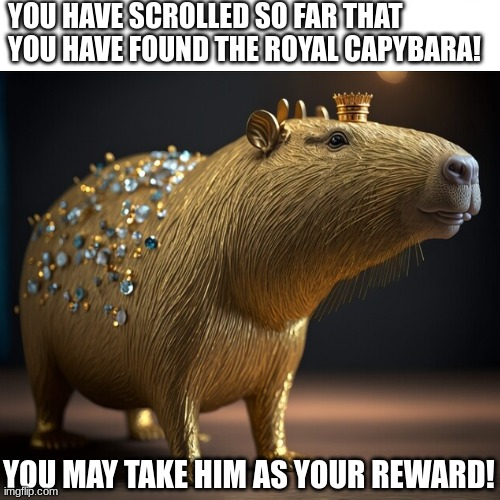